In [ ]:
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [2]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
# Load data
data = pd.read_csv("50_Startups.csv")
data


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# Perform EDA
print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


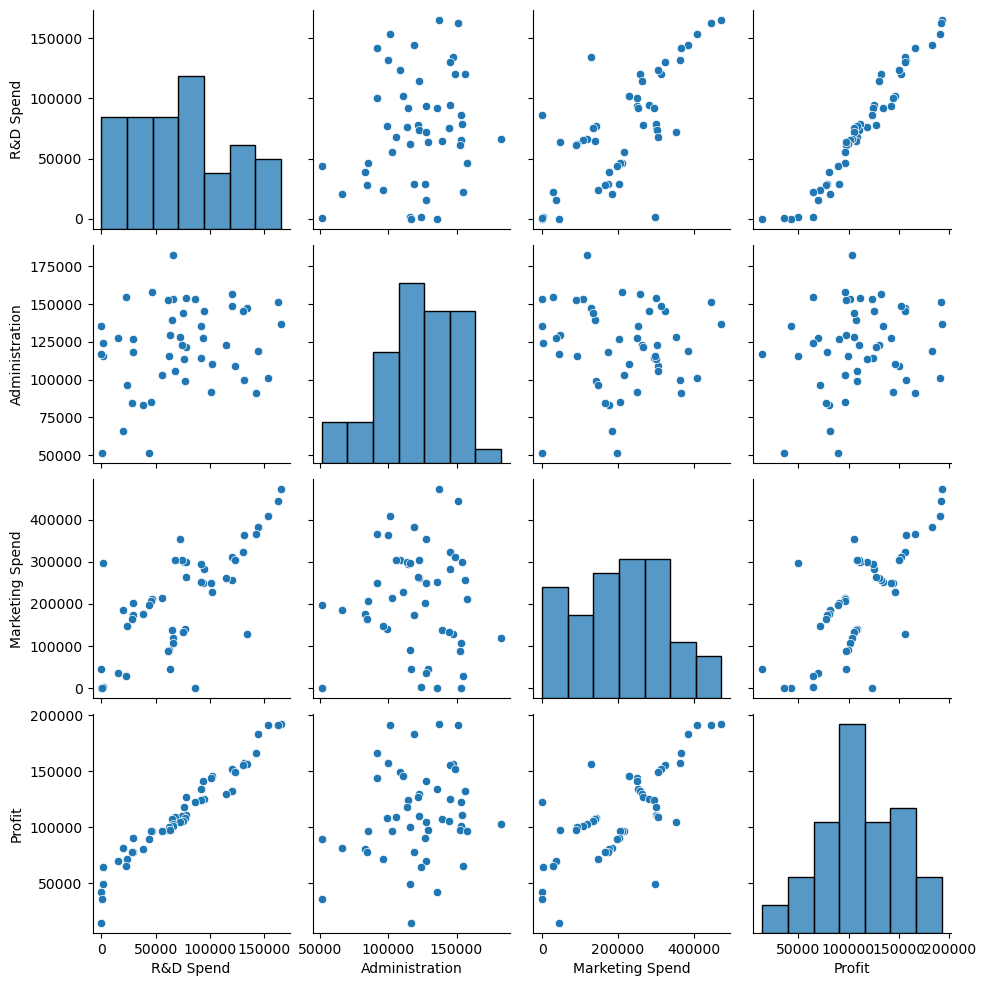

In [5]:
sns.pairplot(data)

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [50]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

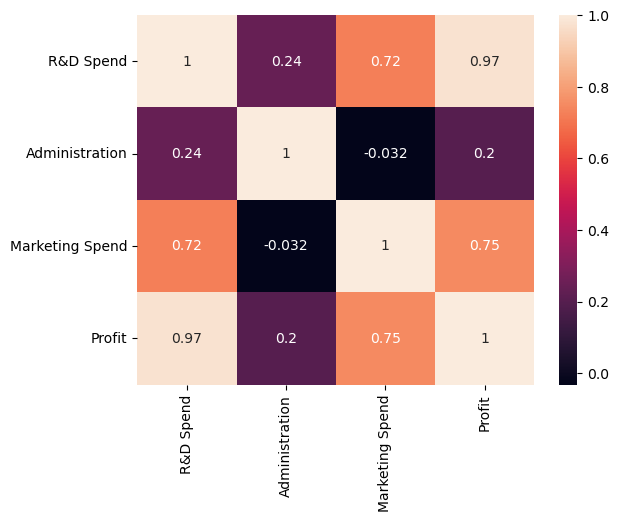

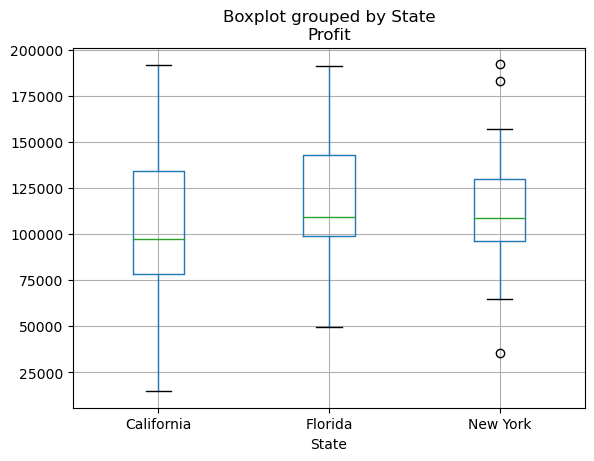

In [8]:
data.boxplot(column=['Profit'], by='State')
plt.show()

In [9]:
#Divide the data into independent and dependent variables. In this case, the independent variables are 'R&D Spend', 'Administration', 'Marketing Spend', and 'State', and the dependent variable is 'Profit'.
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

In [10]:
#Use one hot encoding to convert categorical variable 'State' into numerical variables.
X = pd.get_dummies(X, columns=['State'])
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [11]:
# Normalize and standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[["R&D Spend","Administration","Marketing Spend"]] = scaler.fit_transform(data[["R&D Spend","Administration","Marketing Spend"]])
data[["R&D Spend","Administration","Marketing Spend"]]

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [12]:
#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Initialize the Linear Regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
#Use the model to predict the profit for the testing data
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [43]:
#R2 value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9347068473282424


In [16]:
# evaluate the model's performance
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [17]:
# make a table containing R^2 value for each prepared model
table = {'R^2': r2, 'MSE': mse, 'MAE': mae}
print(table)

{'R^2': 0.9347068473282424, 'MSE': 83502864.03257744, 'MAE': 7514.293659640605}


In [38]:
Here, the R2 model accuracy is 93% using Simple Linear Regression. Now we will import statsmodel Library and try to improve more accuracy 

In [ ]:
# Using Statsmodel Library for Multi Linear Regression
# Comparing the model with Simple Linear Regression and we will try to improve more accuracy

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
# Load data
data = pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [22]:
# check the head of the data
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [23]:
# check for missing values
print(data.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [24]:
# check for correlation between the variables
corr = data.corr()
print(corr)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [25]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [26]:
# check for multicollinearity
# calculate the Variance Inflation Factor (VIF)


In [27]:
labelencoder = LabelEncoder()
data['State'] = labelencoder.fit_transform(data['State'])

In [28]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
Profit             float64
dtype: object

In [29]:
vif = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
print("VIF: ", vif)

VIF:  [30.662561413181663, 13.560873175072553, 9.84717952656493, 2.444870078727815, 81.70782629024197]


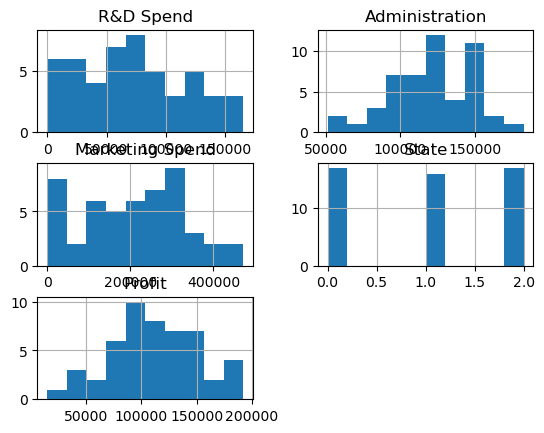

In [30]:
data.hist()
plt.show()

In [34]:
# normalizing the data
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data_norm = pd.DataFrame(data_norm, columns=data.columns)
# standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std = pd.DataFrame(data_std, columns=data.columns)

In [37]:
# prepare the independent and dependent variables
X = data_std.iloc[:, :-1]
y = data_std.iloc[:, -1]

In [39]:
# add a constant term to the independent variables
X = sm.add_constant(X)

In [47]:
# create a linear regression model
model = sm.OLS(y, X).fit()
model

In [48]:
# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           8.51e-29
Time:                        18:57:41   Log-Likelihood:                 4.3223
No. Observations:                  50   AIC:                             1.355
Df Residuals:                      45   BIC:                             10.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.551e-16      0.033  -1.

In [42]:
# R-squared value
r2 = model.rsquared
print("R-squared value: ", r2)

R-squared value:  0.9507462044842656


In [ ]:
Here in this case, Multi Linear Regression has a quite more accurate as compared with Simple Linear Regression. The model accuracy is 95% using statsmodel library